In [1]:
import vmodel
import os
import numpy as np
import h5py
import datetime
import scipy.spatial
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns; sns.set_theme()
import pandas as pd
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import FormatStrFormatter
from itertools import groupby
plt.style.use('default')


/home/lars/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lars/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


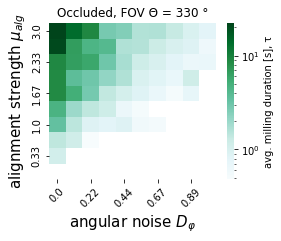

In [2]:
mill = np.load("/home/lars/vmodel_output/test_mill_longsim_mill_astr_dphi.npy")
pol = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        millevents = []
        for rep in range(reps):
            
            lst = mill_abs[i,j,rep,:]
            grpby = groupby(lst)
            
            for k, g in groupby(lst):
                g = list(g)
                if k == 1.0 and len(g) > 20:
                    millevents.append(len(g))
            
            
        mill_time_full[i,j] = np.mean(millevents)
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))


df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]

#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(0.02*df, yticklabels = 2, xticklabels = 2, cbar_kws={'label': "avg. rotation duration [s], τ"},
                 cmap="BuGn", norm=LogNorm())


plt.gcf().set_size_inches(4,3.45)
plt.xlabel("angular noise $D_{φ}$", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("Occluded, FOV Θ = 330 °")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("HM_millDur_log_occ_dphi.pdf",bbox_inches="tight")

/home/lars/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lars/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


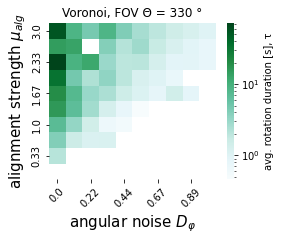

In [2]:
steps = 10
reps = 20
#mill = np.load("/home/lars/vmodel_output/longsim_dphi_astr_vor_mill3_astr_dphi.npy")
#mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_dphi_astr_vor_quick_mill_astr_dphi.npy")
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_dphi_astr_vor_mill_astr_dphi.npy")





paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        millevents = []
        for rep in range(reps):
            
            lst = mill_abs[i,j,rep,:]
            grpby = groupby(lst)
            
            for k, g in groupby(lst):
                g = list(g)
                if k == 1.0 and len(g) > 20:
                    millevents.append(len(g))
            
            
        mill_time_full[i,j] = np.mean(millevents)
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(0.02*df, yticklabels = 2, xticklabels = 2, cbar_kws={'label': "avg. rotation duration [s], τ"},
                 cmap="BuGn", norm=LogNorm())


plt.gcf().set_size_inches(4,3.45)
plt.xlabel("angular noise $D_{φ}$", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("Voronoi, FOV Θ = 330 °")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("HM_millDur_log_vor_dphi.pdf",bbox_inches="tight")

/home/lars/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lars/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


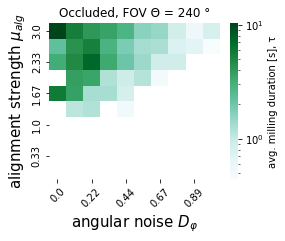

In [4]:
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_preyvis240v2_dphi_astr_occ_Col_mill_astr_dphi.npy")
#pol = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        millevents = []
        for rep in range(reps):
            
            lst = mill_abs[i,j,rep,:]
            grpby = groupby(lst)
            
            for k, g in groupby(lst):
                g = list(g)
                if k == 1.0 and len(g) > 20:
                    millevents.append(len(g))
            
            
        mill_time_full[i,j] = np.mean(millevents)
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(0.02*df, yticklabels = 2, xticklabels = 2, cbar_kws={'label': "avg. rotation duration [s], τ"},
                 cmap="BuGn", norm=LogNorm())#, norm=LogNorm())

plt.tight_layout()
plt.gcf().set_size_inches(4,3.45)
plt.xlabel("angular noise $D_{φ}$", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("Occluded, FOV Θ = 240 °")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("HM_millDur_log_occ_dphi_240.pdf",bbox_inches="tight")

/home/lars/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lars/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


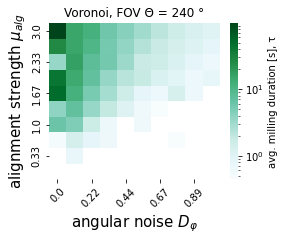

In [5]:
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_preyvis240v2_dphi_astr_vor_mill_astr_dphi.npy")
#pol = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        millevents = []
        for rep in range(reps):
            
            lst = mill_abs[i,j,rep,:]
            grpby = groupby(lst)
            
            for k, g in groupby(lst):
                g = list(g)
                if k == 1.0 and len(g) > 20:
                    millevents.append(len(g))
            
            
        mill_time_full[i,j] = np.mean(millevents)
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(0.02*df, yticklabels = 2, xticklabels = 2, cbar_kws={'label': "avg. rotation duration [s], τ"},
                 cmap="BuGn", norm=LogNorm())

plt.tight_layout()
plt.gcf().set_size_inches(4,3.45)
plt.xlabel("angular noise $D_{φ}$", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("Voronoi, FOV Θ = 240 °")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("HM_millDur_log_vor_dphi_240.pdf",bbox_inches="tight")

/home/lars/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lars/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


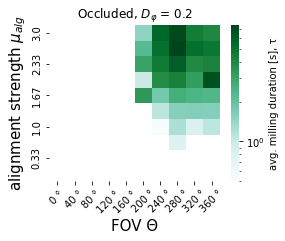

In [6]:
mill = np.load("/home/lars/vmodel_output/longsim_preyvis_astr_mill_astr_visPrey.npy")


steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,360,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        millevents = []
        for rep in range(reps):
            
            lst = mill_abs[i,j,rep,:]
            grpby = groupby(lst)
            
            for k, g in groupby(lst):
                g = list(g)
                if k == 1.0 and len(g) > 20:
                    millevents.append(len(g))
            
            
        mill_time_full[i,j] = np.mean(millevents)
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))
steps = 10
reps = 20





xticks = []



paraChange2_val = paraChange2_val.astype(int)
for i in range(steps):
    xticks.append(str(paraChange2_val[i])+" °")



df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(0.02*df, yticklabels = 2, xticklabels = xticks, cbar_kws={'label': "avg. rotation duration [s], τ"},
                 cmap="BuGn", norm=LogNorm())

plt.tight_layout()
plt.gcf().set_size_inches(4,3.45)
plt.xlabel("FOV Θ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("Occluded, $D_{φ}$ = 0.2")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("HM_millDur_log_occ_vis.pdf",bbox_inches="tight")

/home/lars/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lars/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


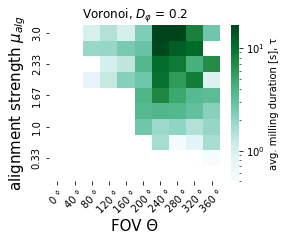

In [7]:
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_visPrey_astr_vor_mill_astr_visPrey.npy")
#pol = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,360,steps)
mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        millevents = []
        for rep in range(reps):
            
            lst = mill_abs[i,j,rep,:]
            grpby = groupby(lst)
            
            for k, g in groupby(lst):
                g = list(g)
                if k == 1.0 and len(g) > 20:
                    millevents.append(len(g))
            
            
        mill_time_full[i,j] = np.mean(millevents)
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

steps = 10
reps = 20


xticks = []

paraChange2_val = paraChange2_val.astype(int)
for i in range(steps):
    xticks.append(str(paraChange2_val[i])+" °")





df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(0.02*df, yticklabels = 2, xticklabels = xticks, cbar_kws={'label': "avg. rotation duration [s], τ"},
                 cmap="BuGn", norm=LogNorm())

plt.tight_layout()
plt.gcf().set_size_inches(4,3.45)
plt.xlabel("FOV Θ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("Voronoi, $D_{φ}$ = 0.2")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("HM_millDur_log_vor_vis.pdf",bbox_inches="tight")